# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

#Weather URL
weather_url = "http://api.openweathermap.org/data/2.5/weather?"

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
class Keys:
    is_fetch_ok = "Is_Fetch_Ok"
    city_id     = "City_ID"
    city        = "City"
    cloudiness  = "Cloudiness"
    country     = "Country"
    date        = "Date"
    humidity    = "Humidity"
    lat         = "Lat"
    lng         = "Lng"
    max_temp    = "Max Temp"
    wind_speed  = "Wind Speed"   

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs     = []

#Keeping track of processed cities
cities       = []

#Stores all weather-relevant data for a given set of coordinates
weather_container = []

#************************************#
#*            Test Vars             *#
#************************************#
geographical_span = 1500  #was 1500 TODO change back
is_test           = False #TODO remove
test_humidity     = 100   #TODO remove
#************************************#
#*            Test Vars             *#
#************************************#

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=geographical_span)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=geographical_span)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    
    city_name    = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    country_code = citipy.nearest_city(lat_lng[0], lat_lng[1]).country_code

    # If the city is unique, then add it to 'cities'
    if city_name not in cities:
        
        weather_hash  = {
                             Keys.is_fetch_ok : False,
                             Keys.city_id     : None, 
                             Keys.city        : city_name, 
                             Keys.cloudiness  : None, 
                             Keys.country     : country_code.upper(),
                             Keys.date        : None,
                             Keys.humidity    : None,
                             Keys.lat         : lat_lng[0],
                             Keys.lng         : lat_lng[1],
                             Keys.max_temp    : None,
                             Keys.wind_speed  : None
                        }        
        
        weather_container.append(weather_hash)
        cities.append(city_name)
        
# Print the city count to confirm (sufficient) count
print(f"{len(cities)}")

The pseudo-random number of unique cities in this unit of execution is 607


In [4]:
def print_city_log(status_code : int, 
                   city_name   : str       = None, 
                   rec_set     : int       = None, 
                   success_fetch_cntr :int = None) -> None:
    """
    Prints running log of city number and name, if and only if, if the city contains 500+ people, otherwise
    the city name will not be printed

    :param int status_code: The status code of the Response
    :param str city_name: The city name for a given set of coordinates
    :param int rec_set: The count of the processing record set
    :param int success_fetch_cntr: The current record fetch count
    """        
    if(status_code == 200):
        print(f"Processing Record {success_fetch_cntr} of Set {rec_set} | {city_name}")
    else:
        print("City not found. Skipping...")

In [5]:
def print_line_sep() -> None:
    
    """
    Prints a line delimiter
    """       
    
    print("----------------------------")

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
# Build query URL
  
#out_cols = ["City_ID","Cloudiness","Country","Date","Humidity","Lat","Lng","Max Temp","Wind Speed"]

total_success_fetch_cntr = 0
rec_set_cntr = 0
set_cntr = 1

print("Beginning Data Retrieval")
print_line_sep()

for i in range(len(weather_container)):
    
    weather_hash = weather_container[i]
    city_name    = weather_hash[Keys.city]
    
    weather_query_url = weather_url + "appid=" + weather_api_key + "&q=" + city_name + "&units=imperial"
    
    if (i + 1) % 60 != 0:
        
        weather_response  = requests.get(weather_query_url)
        status_code       = weather_response.status_code

        if status_code == 200:

            weather_json = weather_response.json()
            
            rec_set_cntr += 1
            
            weather_hash[Keys.is_fetch_ok] = True
            weather_hash[Keys.city_id]     = total_success_fetch_cntr #id starts at 0 not 1
            total_success_fetch_cntr += 1
            
            try:
            
                weather_hash[Keys.date]        = weather_json["dt"]
                
                weather_hash[Keys.max_temp]    = weather_json["main"]["temp_max"]
                weather_hash[Keys.humidity]    = weather_json["main"]["humidity"]      
                weather_hash[Keys.wind_speed]  = weather_json["wind"]["speed"]
                weather_hash[Keys.cloudiness]  = weather_json["clouds"]["all"]
                
                if is_test:
                    time.sleep(1)              
            
            except IndexError as ie:
                print(f"Index Exception occured {ie}")
                break
                
            except Exception as e:
                print(f"Index Exception occured {e}")
                break                
                
            else:
                      
                print_city_log(status_code,
                               city_name,
                               set_cntr,
                               rec_set_cntr)  
        else:
            print_city_log(status_code)
    
    else:
        set_cntr    += 1
        rec_set_cntr = 0
        time.sleep(60)

print_line_sep()
print("Data Retrieval Complete")
print_line_sep()


Beginning Data Retrieval
----------------------------
Processing Record 1 of Set 1 | mataura
Processing Record 2 of Set 1 | kindu
Processing Record 3 of Set 1 | chokurdakh
Processing Record 4 of Set 1 | puerto ayora
City not found. Skipping...
Processing Record 5 of Set 1 | san cristobal
Processing Record 6 of Set 1 | gold coast
Processing Record 7 of Set 1 | dikson
Processing Record 8 of Set 1 | vostok
Processing Record 9 of Set 1 | williams lake
Processing Record 10 of Set 1 | hermanus
Processing Record 11 of Set 1 | mahur
Processing Record 12 of Set 1 | saint-augustin
City not found. Skipping...
Processing Record 13 of Set 1 | voh
Processing Record 14 of Set 1 | kuito
Processing Record 15 of Set 1 | kudymkar
Processing Record 16 of Set 1 | victoria
Processing Record 17 of Set 1 | yar-sale
Processing Record 18 of Set 1 | kharian
Processing Record 19 of Set 1 | buraydah
Processing Record 20 of Set 1 | cape town
Processing Record 21 of Set 1 | punta arenas
Processing Record 22 of Set 1

Processing Record 28 of Set 4 | nador
Processing Record 29 of Set 4 | brigantine
Processing Record 30 of Set 4 | evensk
Processing Record 31 of Set 4 | ulaangom
Processing Record 32 of Set 4 | long
Processing Record 33 of Set 4 | dwarka
Processing Record 34 of Set 4 | bintulu
City not found. Skipping...
Processing Record 35 of Set 4 | ouadda
Processing Record 36 of Set 4 | semnan
Processing Record 37 of Set 4 | noyabrsk
Processing Record 38 of Set 4 | mantua
Processing Record 39 of Set 4 | mirabad
Processing Record 40 of Set 4 | chuy
Processing Record 41 of Set 4 | bambous virieux
Processing Record 42 of Set 4 | kiama
Processing Record 43 of Set 4 | maine-soroa
Processing Record 44 of Set 4 | otjimbingwe
Processing Record 45 of Set 4 | shingu
Processing Record 46 of Set 4 | copiapo
Processing Record 47 of Set 4 | bredy
Processing Record 48 of Set 4 | severo-kurilsk
Processing Record 49 of Set 4 | mwingi
Processing Record 50 of Set 4 | rio grande
Processing Record 51 of Set 4 | vila vel

Processing Record 1 of Set 8 | phan thiet
Processing Record 2 of Set 8 | tambura
Processing Record 3 of Set 8 | gagnoa
Processing Record 4 of Set 8 | madimba
Processing Record 5 of Set 8 | kampot
Processing Record 6 of Set 8 | kuusamo
Processing Record 7 of Set 8 | olinda
Processing Record 8 of Set 8 | hami
Processing Record 9 of Set 8 | sawtell
Processing Record 10 of Set 8 | oksfjord
Processing Record 11 of Set 8 | general roca
Processing Record 12 of Set 8 | dir
Processing Record 13 of Set 8 | victor harbor
Processing Record 14 of Set 8 | komsomolskiy
Processing Record 15 of Set 8 | savannah bight
Processing Record 16 of Set 8 | ilave
Processing Record 17 of Set 8 | tuensang
Processing Record 18 of Set 8 | comodoro rivadavia
Processing Record 19 of Set 8 | xuanhua
Processing Record 20 of Set 8 | altayskoye
Processing Record 21 of Set 8 | northam
City not found. Skipping...
Processing Record 22 of Set 8 | puebla
Processing Record 23 of Set 8 | hasaki
Processing Record 24 of Set 8 | p

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [195]:
# Put data into DataFrame
raw_results = pd.DataFrame(weather_container)
fetched_results_df = raw_results.loc[raw_results[Keys.is_fetch_ok] == True][[Keys.city_id,
                                                                             Keys.city,
                                                                             Keys.cloudiness,
                                                                             Keys.country,
                                                                             Keys.date,
                                                                             Keys.humidity,
                                                                             Keys.lat,
                                                                             Keys.lng,
                                                                             Keys.max_temp,
                                                                             Keys.wind_speed]].set_index(Keys.city_id)



fetched_results_copy_df = fetched_results_df.copy(deep=True)
fetched_results_copy_df = fetched_results_copy_df.astype({Keys.lat:float}).round(2)
fetched_results_copy_df = fetched_results_copy_df.astype({Keys.lng:float}).round(2)

#Export the DataFrame to CSV
fetched_results_copy_df.to_csv(output_data_file,
                          header=True,
                          mode='w',
                          index=True)

#Formatting has been property applied and data exported, remove it
fetched_results_copy_df = None


##Temp DataFrame for display
temp_dataframe = fetched_results_df.copy(deep = True) #Not in situ

temp_dataframe = temp_dataframe.reset_index()

temp_dataframe = temp_dataframe.astype({Keys.city_id:    int,
                                        Keys.humidity:   int,
                                        Keys.cloudiness: int,
                                        Keys.date: str})

temp_dataframe = temp_dataframe.astype({Keys.lat:float}).round(2)
temp_dataframe = temp_dataframe.astype({Keys.lng:float}).round(2)

temp_dataframe[Keys.date].replace('.0', '', inplace = True) 

temp_dataframe[[Keys.city,
                Keys.lat,
                Keys.lng,
                Keys.max_temp,
                Keys.humidity,
                Keys.cloudiness,
                Keys.wind_speed,
                Keys.country,
                Keys.date]].head(10) 

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,mataura,-71.08,-161.00,46.26,98,25,0.18,PF,1635438719.0
1,kindu,-2.19,25.43,66.78,99,82,2.42,CD,1635438719.0
2,chokurdakh,87.78,156.26,-2.70,93,99,3.22,RU,1635438719.0
3,puerto ayora,-2.50,-112.33,76.96,87,93,4.00,EC,1635438720.0
4,san cristobal,-14.14,-91.48,77.18,60,56,6.31,EC,1635438720.0
5,gold coast,-27.61,154.55,75.00,91,38,1.01,AU,1635438720.0
6,dikson,75.22,84.70,6.31,94,59,7.90,RU,1635438720.0
7,vostok,48.49,151.76,29.41,93,16,2.89,RU,1635438510.0
8,williams lake,51.94,-122.98,36.97,87,90,4.61,CA,1635438721.0
9,hermanus,-76.15,1.63,65.80,84,0,8.55,ZA,1635438721.0


In [196]:
temp_dataframe = None #Clean up

In [197]:
#Display discriptive fundamental statistics visualization of successfully fetched results

fetched_results_df[[Keys.city,
                    Keys.lat,
                    Keys.lng,
                    Keys.max_temp,
                    Keys.humidity,
                    Keys.cloudiness,
                    Keys.wind_speed,
                    Keys.country,
                    Keys.date]].describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000,5.510000e+02
mean,15.834000,19.635752,62.853321,70.125227,52.580762,8.018911,1.635439e+09
std,36.886360,93.041755,21.927598,21.421330,38.302674,5.508925,2.239803e+02
min,-86.030832,-175.592880,-18.740000,8.000000,0.000000,0.000000,1.635438e+09
25%,-12.091275,-58.771245,49.400000,59.000000,13.000000,3.700000,1.635439e+09
50%,16.119261,23.849238,69.150000,75.000000,58.000000,6.780000,1.635439e+09
75%,45.447535,102.324847,79.350000,87.000000,90.000000,11.020000,1.635439e+09
max,89.779435,179.901268,100.490000,100.000000,100.000000,34.610000,1.635439e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [198]:
#  Get the indices of cities that have humidity over 100%.
humidity_limit = test_humidity  ##Test Humidity [Test Variable] set above

excessive_humidity_df = fetched_results_df.loc[fetched_results_df[Keys.humidity] > humidity_limit].reset_index()[[Keys.city_id,Keys.country,Keys.city,Keys.humidity]]  \
                                                                                                  .astype({Keys.city_id: 'int'})                                                                       
ex_recs_num = len(excessive_humidity_df)

print(f"There are {ex_recs_num} records with humidity over {humidity_limit}% to remove")

if ex_recs_num > 0:
    excessive_humidity_df.head(15)

There are 0 records with humidity over 100% to remove


In [199]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.

# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

clean_city_data = pd.DataFrame()

if len(clean_city_data) > 0:
    excessive_humidity_df = excessive_humidity_df.astype({Keys.city_id: 'int'})
    idxs_to_drop = list((x for x in list(excessive_humidity_df[Keys.city_id])))
    clean_city_data = fetched_results_df.drop(fetched_results_df.index[idxs_to_drop], inplace = False )
else:
    clean_city_data = fetched_results_df.copy(deep = True)

clean_city_data = clean_city_data.reset_index()

clean_city_data = clean_city_data.astype({Keys.city_id:    int,
                                          Keys.humidity:   int,
                                          Keys.cloudiness: int,
                                          Keys.date: str})

clean_city_data = clean_city_data.astype({Keys.lat:float}).round(2)
clean_city_data = clean_city_data.astype({Keys.lng:float}).round(2)

clean_city_data[Keys.date].replace('.0', '', inplace = True) 

clean_city_data[[Keys.city,
                 Keys.lat,
                 Keys.lng,
                 Keys.max_temp,
                 Keys.humidity,
                 Keys.cloudiness,
                 Keys.wind_speed,
                 Keys.country,
                 Keys.date]].head(15)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,mataura,-71.08,-161.00,46.26,98,25,0.18,PF,1635438719.0
1,kindu,-2.19,25.43,66.78,99,82,2.42,CD,1635438719.0
2,chokurdakh,87.78,156.26,-2.70,93,99,3.22,RU,1635438719.0
3,puerto ayora,-2.50,-112.33,76.96,87,93,4.00,EC,1635438720.0
4,san cristobal,-14.14,-91.48,77.18,60,56,6.31,EC,1635438720.0
5,gold coast,-27.61,154.55,75.00,91,38,1.01,AU,1635438720.0
6,dikson,75.22,84.70,6.31,94,59,7.90,RU,1635438720.0
7,vostok,48.49,151.76,29.41,93,16,2.89,RU,1635438510.0
8,williams lake,51.94,-122.98,36.97,87,90,4.61,CA,1635438721.0
9,hermanus,-76.15,1.63,65.80,84,0,8.55,ZA,1635438721.0


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

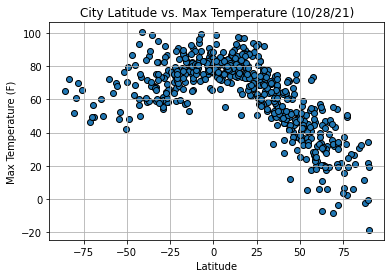

In [200]:
#1 Obtain mm/dd/yyyy date from the dataset

latitudes = clean_city_data[Keys.lat]
max_temps = clean_city_data[Keys.max_temp]

plt.scatter(latitudes, max_temps, marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title(f'City Latitude vs. Max Temperature ({time.strftime("%m/%d/%y")})')
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../Output/City Latitude vs. Max Temperature.png")

# Show plot
plt.show()

## Latitude vs. Humidity Plot

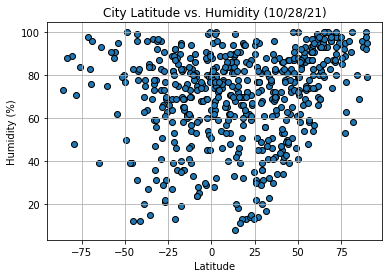

In [201]:
latitudes = clean_city_data[Keys.lat]
humidity  = clean_city_data[Keys.humidity]

plt.scatter(latitudes, humidity, marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title(f'City Latitude vs. Humidity ({time.strftime("%m/%d/%y")})')
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../Output/City Latitude vs. Humidity.png")

# Show plot
plt.show()

## Latitude vs. Cloudiness Plot

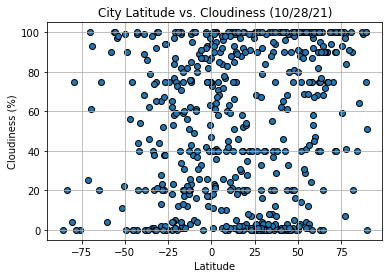

In [202]:
latitudes = clean_city_data[Keys.lat]
cloudiness  = clean_city_data[Keys.cloudiness]

plt.scatter(latitudes, cloudiness, marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title(f'City Latitude vs. Cloudiness ({time.strftime("%m/%d/%y")})')
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../Output/City Latitude vs. Cloudiness.png")

# Show plot
plt.show()

## Latitude vs. Wind Speed Plot

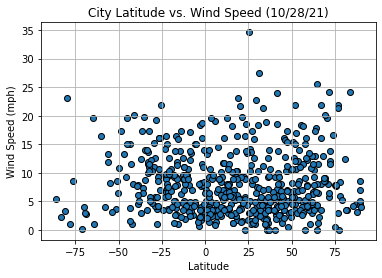

In [203]:
latitudes  = clean_city_data[Keys.lat]
wind_speed = clean_city_data[Keys.wind_speed]

plt.scatter(latitudes, wind_speed, marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title(f'City Latitude vs. Wind Speed ({time.strftime("%m/%d/%y")})')
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../Output/City Latitude vs. Wind Speed.png")

# Show plot
plt.show()

## Linear Regression

In [204]:
#Latitude 0 is neither north or south
northern_hemisphere_df = clean_city_data.loc[clean_city_data[Keys.lat] > 0]
southern_hemisphere_df = clean_city_data.loc[clean_city_data[Keys.lat] < 0]

northern_max_temps = northern_hemisphere_df[Keys.max_temp]
southern_max_temps = southern_hemisphere_df[Keys.max_temp]

northern_cloudiness = northern_hemisphere_df[Keys.cloudiness]
southern_cloudiness = southern_hemisphere_df[Keys.cloudiness]

northern_humidity = northern_hemisphere_df[Keys.humidity]
southern_humidity = southern_hemisphere_df[Keys.humidity]

northern_wind_speed = northern_hemisphere_df[Keys.wind_speed]
southern_wind_speed = southern_hemisphere_df[Keys.wind_speed]

northern_latitudes = northern_hemisphere_df[Keys.lat]
southern_latitudes = southern_hemisphere_df[Keys.lat]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression


The r-value is: 0.7332267315939313


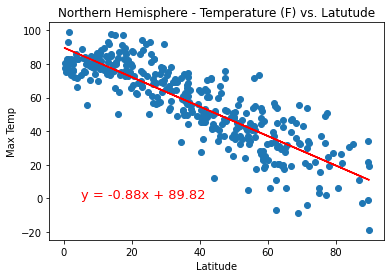

In [205]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_latitudes, northern_max_temps)

regress_values = northern_latitudes * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"\nThe r-value is: {rvalue**2}",sep="\n")

plt.scatter(northern_latitudes, northern_max_temps)
plt.plot(northern_latitudes, regress_values,"r-")

plt.annotate(line_eq, (5, 0), fontsize=13, color="red")

plt.title(f'Northern Hemisphere - Temperature (F) vs. Latutude')
plt.xlabel('Latitude')
plt.ylabel('Max Temp')

# Save the figure
plt.savefig("../Output/Northern Hemisphere - Temperature (F) vs. Latutude.png")

plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression


The r-value is: 0.2520617879001849


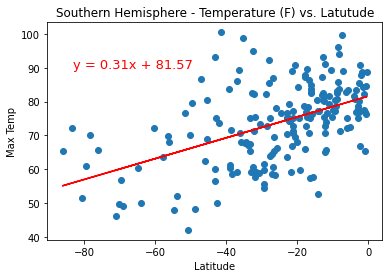

In [206]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_latitudes, southern_max_temps)

regress_values = southern_latitudes * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"\nThe r-value is: {rvalue**2}",sep="\n")

plt.scatter(southern_latitudes, southern_max_temps)
plt.plot(southern_latitudes, regress_values,"r-")

plt.annotate(line_eq, (-83, 90), fontsize=13, color="red")

plt.title(f'Southern Hemisphere - Temperature (F) vs. Latutude')
plt.xlabel('Latitude')
plt.ylabel('Max Temp')

# Save the figure
plt.savefig("../Output/Southern Hemisphere - Temperature (F) vs. Latutude.png")

plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression


The r-value is: 0.1033920056906124


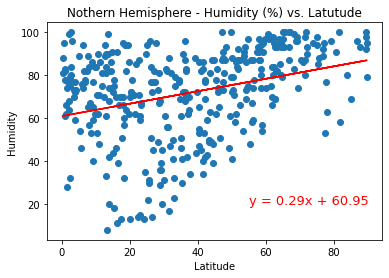

In [207]:

(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_latitudes, northern_humidity)

regress_values = northern_latitudes * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"\nThe r-value is: {rvalue**2}",sep="\n")

plt.scatter(northern_latitudes, northern_humidity)
plt.plot(northern_latitudes, regress_values,"r-")

plt.annotate(line_eq, (55, 20), fontsize=13, color="red")

plt.title(f'Nothern Hemisphere - Humidity (%) vs. Latutude')
plt.xlabel('Latitude')
plt.ylabel('Humidity')

# Save the figure
plt.savefig("../Output/Northern Hemisphere - Humidity (%) vs. Latitude.png")

plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression


The r-value is: 0.014452426048316636


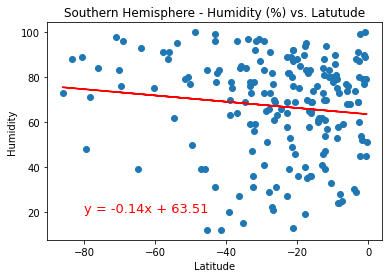

In [208]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_latitudes, southern_humidity)

regress_values = southern_latitudes * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"\nThe r-value is: {rvalue**2}",sep="\n")

plt.scatter(southern_latitudes, southern_humidity)
plt.plot(southern_latitudes, regress_values,"r-")

plt.annotate(line_eq, (-80, 20), fontsize=13, color="red")

plt.title(f'Southern Hemisphere - Humidity (%) vs. Latutude')
plt.xlabel('Latitude')
plt.ylabel('Humidity')

# Save the figure
plt.savefig("../Output/Southern Hemisphere - Humidity (%) vs. Latitude.png")

plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression


The r-value is: 0.03961825579265677


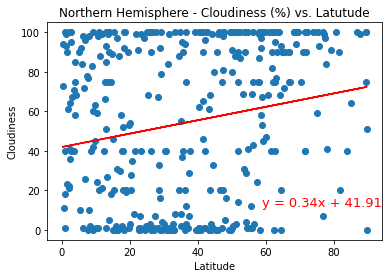

In [209]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_latitudes, northern_cloudiness)

regress_values = northern_latitudes * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"\nThe r-value is: {rvalue**2}",sep="\n")

plt.scatter(northern_latitudes, northern_cloudiness)
plt.plot(northern_latitudes, regress_values,"r-")

plt.annotate(line_eq, (59, 12), fontsize=13, color="red")

plt.title(f'Northern Hemisphere - Cloudiness (%) vs. Latutude')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

# Save the figure
plt.savefig("../Output/Northern Hemisphere - Cloudiness (%) vs. Latitude.png")

plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression


The r-value is: 0.009677225228048454


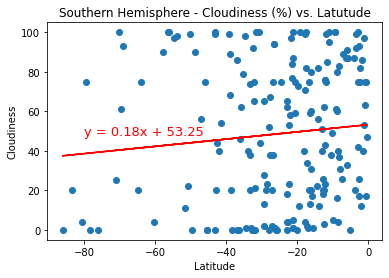

In [210]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_latitudes, southern_cloudiness)

regress_values = southern_latitudes * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"\nThe r-value is: {rvalue**2}",sep="\n")

plt.scatter(southern_latitudes, southern_cloudiness)
plt.plot(southern_latitudes, regress_values,"r-")

plt.annotate(line_eq, (-80, 48), fontsize=13, color="red") 

plt.title(f'Southern Hemisphere - Cloudiness (%) vs. Latutude')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

# Save the figure
plt.savefig("../Output/Southern Hemisphere - Cloudiness (%) vs. Latitude.png")

plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression


The r-value is: 0.01572753558476735


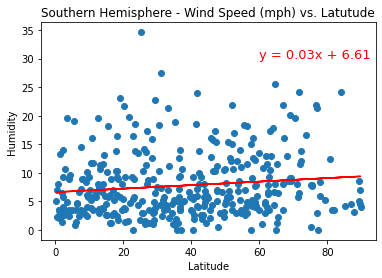

In [211]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_latitudes, northern_wind_speed)

regress_values = northern_latitudes * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"\nThe r-value is: {rvalue**2}",sep="\n")

plt.scatter(northern_latitudes, northern_wind_speed)
plt.plot(northern_latitudes, regress_values,"r-")

plt.annotate(line_eq, (60, 30), fontsize=13, color="red")

plt.title(f'Southern Hemisphere - Wind Speed (mph) vs. Latutude')
plt.xlabel('Latitude')
plt.ylabel('Humidity')

# Save the figure
plt.savefig("../Output/Nothern Hemisphere - Wind Speed (mph) vs. Latitude.png")

plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression


The r-value is: 0.0020508820459562006


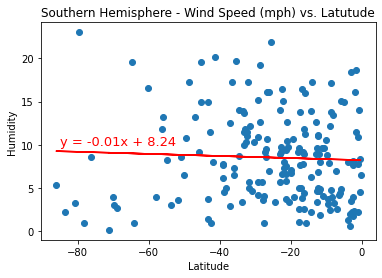

In [194]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_latitudes, southern_wind_speed)

regress_values = southern_latitudes * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"\nThe r-value is: {rvalue**2}",sep="\n")

plt.scatter(southern_latitudes, southern_wind_speed)
plt.plot(southern_latitudes, regress_values,"r-")

plt.annotate(line_eq, (-85, 10), fontsize=13, color="red")

plt.title(f'Southern Hemisphere - Wind Speed (mph) vs. Latutude')
plt.xlabel('Latitude')
plt.ylabel('Humidity')

# Save the figure
plt.savefig("../Output/Southern Hemisphere - Wind Speed (mph) vs. Latitude.png")

plt.show()